# Práctica Redes Neuronales

## Estimación del precio de venta en vehículos de ocasión

### (REGRESION)

Una red de concesionarios de EEUU, cliente de nuestra empresa de desarrollo, nos pide
una solución para poder predecir el precio de venta estimado para un vehículo, a partir
de una serie de datos.

Se te proporciona un dataset que tiene una variable dependiente y 7 variables
independientes. Trata los datos para intentar conseguir un modelo de predicción del
precio.

Descripción de los atributos
- Price - Target Variable.
- Year - Year of the car purchased.
- Mileage - The no.of kms drove by the car.
- City - In which city it was sold.
- State - In which state it was sold.
- Vin - a unique number for a car.
- Make - Manufacturer of the car.
- Model - The model(name) of the car

Tu objetivo es conseguir un modelo de red neuronal con las mejores métricas que
puedas conseguir (en regresión)

Realiza los pasos habituales de preparación de los datos (limpieza, preprocesado e
ingeniería de características), crea el modelo (o modelos) de redes neuronales y
visualiza sus resultados.

### Importación de Librerías

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 #METRICAS
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error #METRICAS

from tensorflow.keras.optimizers import Adam #Nuevo entrenamiento



### Carga del Dataset y primeros datos

In [8]:
df = pd.read_csv('true_car_listings.csv')

df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


## Limpieza de Datos

### Detección de Anomalías

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [10]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


### Detección de Nulos

In [11]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

### Detección de Duplicados

In [12]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
852117    False
852118    False
852119    False
852120    False
852121    False
Length: 852122, dtype: bool

### Visualización de Columnas

In [13]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


### Identificación de las columnas

Vamos a asignar las características

In [15]:
numericas = ['Year','Mileage']
categoricas = ['City','State','Make','Model']
target = ['Price']
all_columns = ['Year','Mileage','City','State','Make','Model']


print(df['City'].value_counts())
print()
print(df['State'].value_counts())
print()
print(df['Make'].value_counts())
print()
print(df['Model'].value_counts())
print()

City
Houston          12703
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Los Banos            4
Pleasant Hill        4
Armona               4
Pen Argyl            4
Royston              2
Name: count, Length: 2553, dtype: int64

State
TX    94654
CA    80437
FL    72530
GA    39414
IL    38680
NC    37530
VA    35011
PA    28130
NY    27932
NJ    27852
OH    23259
WA    23149
CO    23004
AZ    22401
TN    19166
MA    17990
MD    17572
IN    16465
MO    16165
KY    13691
AL    13293
WI    11255
MN    10996
CT    10906
UT    10418
OR    10352
MI    10328
SC     9790
OK     9584
LA     8528
KS     7894
AR     6952
NV     6887
MS     6242
NH     5694
NE     4924
IA     4840
NM     4729
ID     3501
HI     2995
DE     2418
MT     1984
ME     1920
RI     1858
AK     1663
WV     1501
SD     1267
VT     1123
ND     1092
Fl      783
WY      610
Va      248
Md      135
Ga      109
ga      100
Az       63
Oh       52
Ca       31

#### Quitamos la columna Vin porque no aporta nada al modelo

In [16]:
df.drop(columns=['Vin'], inplace=True)

## Visualización de los Datos

### Gráfico Boxplot

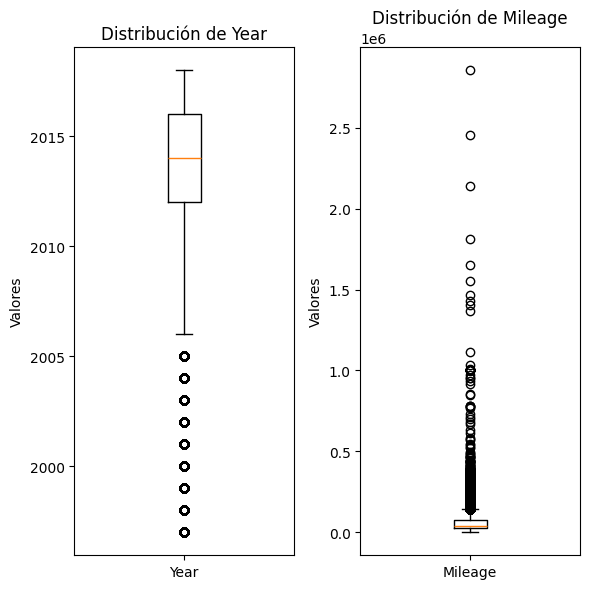

In [17]:
#SOLO LAS NUMÉRICAS
ig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
axes = axes.flatten() 

for i, var in enumerate(numericas): 
    axes[i].boxplot(df[var], tick_labels=[var]) 
    axes[i].set_title(f'Distribución de {var}') 
    axes[i].set_ylabel('Valores')

for j in range(len(numericas), len(axes)): 
    axes[j].axis('off')

plt.tight_layout() 
plt.show()

Podemos ver que hay diferentes outliers pero podrían ser totalmente válidos

Comprobaremos **Mileage** para ver cuantos kilómetros tiene máximo

In [18]:
df['Mileage'].max()

np.int64(2856196)

## Ingeniería de Características

In [19]:
#HACEMOS LABELENCODER
#(SEPARA EN NUMEROS EJ: Marcas (Audi, BMW y Toyota) - Audi = 1, BMW = 2, Toyota = 3)


label_encoder = LabelEncoder()
for col in categoricas:
    df[col] = label_encoder.fit_transform(df[col])

#Mostramos   
df.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,646,49,1,1194
1,10888,2013,19606,1260,39,1,1193
2,8995,2013,48851,646,49,1,1194
3,10999,2014,39922,2490,6,1,1193
4,14799,2016,22142,1231,50,1,1196


## Preparación y separación de los datos

In [20]:
#Eliminamos el target y lo pasamos a y
X = df.drop(target, axis=1)
y = df[target]

#Dividimos en 20 % para test y 80 % entrenamiento (train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalizamos

In [21]:
#Estandarizamos con StandardScaler
scaler = StandardScaler()

#Cogemos todos los datos
X_train[all_columns] = scaler.fit_transform(X_train[all_columns])
X_test[all_columns] = scaler.fit_transform(X_test[all_columns])

## Preparación de la Red y Entrenamiento

In [22]:
#Creamos el modelo de red neuronal
#early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Entrada con la cantidad de características
    Dense(8, activation='relu'),  # 2a capa oculta
    Dense(1, activation='linear')  # Capa de salida (sin activación para regresión)
])
#Compilar el modelo con una función de pérdida para regresión
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
#Mostramos configuración
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Usamos EarlyStopping para evitar sobreajuste y entrenamos
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/10
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 187299840.0000 - mae: 9607.9863 - val_loss: 178688064.0000 - val_mae: 8857.2793
Epoch 2/10
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 163483488.0000 - mae: 8527.7285 - val_loss: 157285888.0000 - val_mae: 7782.2163
Epoch 3/10
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 146195328.0000 - mae: 7648.3315 - val_loss: 153549056.0000 - val_mae: 7596.4570
Epoch 4/10
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 143483392.0000 - mae: 7569.1475 - val_loss: 153355920.0000 - val_mae: 7591.3569
Epoch 5/10
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 144504320.0000 - mae: 7571.0728 - val_loss: 153211104.0000 - val_mae: 7584.2515
Epoch 6/10
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 143460176.0000 - mae: 7554.5557 - val_loss: 153049696.0000 - val_mae: 7580.7749
Epoch 7/10
17043/17043 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 143118256.0000 - mae: 7537.5381 - val_loss: 152869712.0000 - val_

## Evaluación del Modelo

Evaluamos con el conjunto del test

5326/5326 ━━━━━━━━━━━━━━━━━━━━ 4s 655us/step


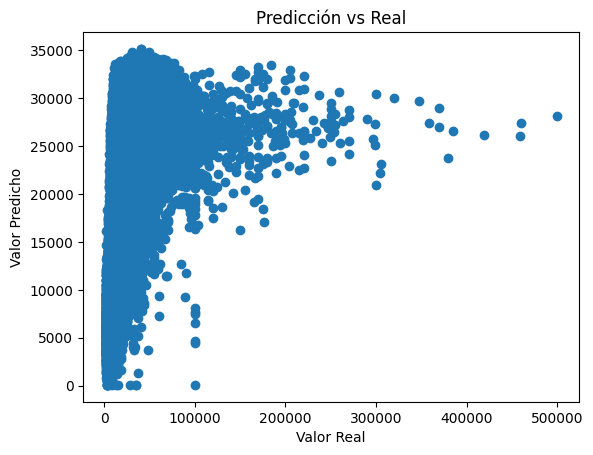

In [25]:
y_pred = model.predict(X_test)

#SCATTER
plt.scatter(y_test, y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Predicción vs Real')
plt.show()

### Métricas

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

# Calculamos R²
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 7521.829205719214
MSE: 142820213.8888774
RMSE: 11950.741143915611
R²: 0.22319704294204712


### Visualización Historial

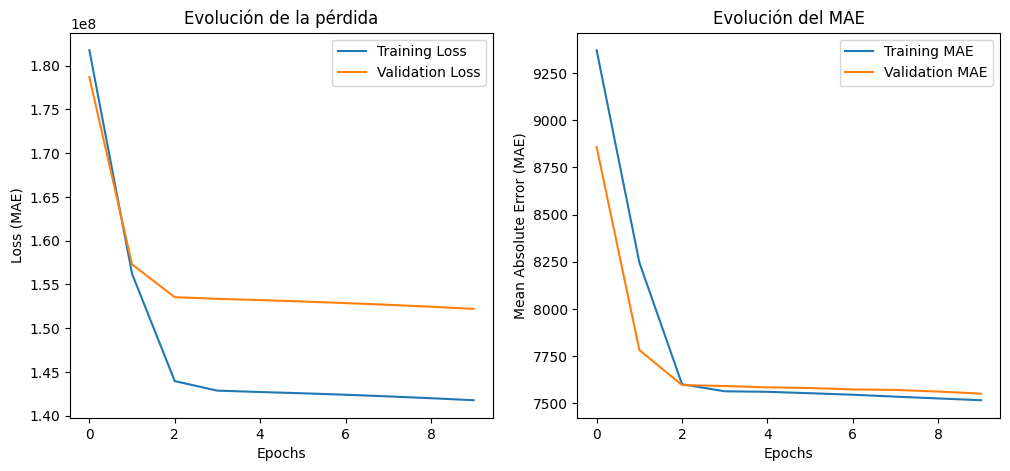

In [29]:

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']            # Nombre correcto para MAE de entrenamiento
val_mae = history.history['val_mae']    # Nombre correcto para MAE de validación



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.title('Evolución de la pérdida')

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Evolución del MAE')

plt.show()

### Análisis Exploratorio de Datos

Solo con las columnas numéricas

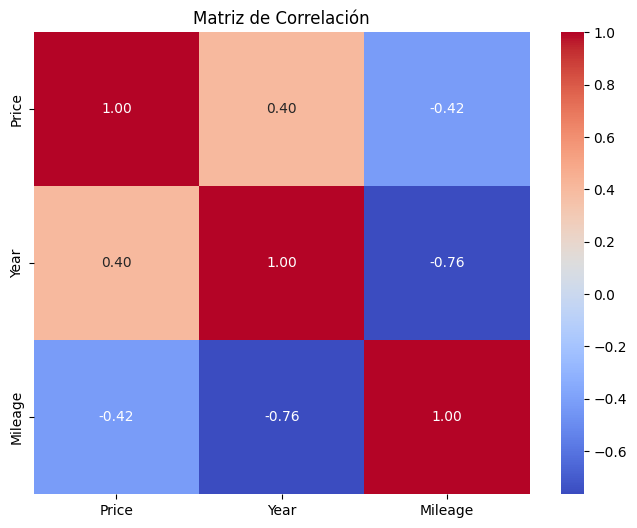

In [32]:
numerical_correlation = ['Price', 'Year', 'Mileage']
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_correlation].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

### Nuevo entrenamiento

In [35]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=input_dim))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu')) 
model.add(Dense(1, activation='linear')) 

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.summary()

c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,569 (178.00 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Usamos EarlyStopping para evitar sobreajuste y entrenamos
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 9331.6143 - mean_absolute_error: 9331.6143 - val_loss: 7161.0391 - val_mean_absolute_error: 7161.0391
Epoch 2/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 7902.8550 - mean_absolute_error: 7902.8550 - val_loss: 7102.6611 - val_mean_absolute_error: 7102.6611
Epoch 3/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 7861.7061 - mean_absolute_error: 7861.7061 - val_loss: 7052.1548 - val_mean_absolute_error: 7052.1548
Epoch 4/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 7784.5371 - mean_absolute_error: 7784.5371 - val_loss: 7059.6621 - val_mean_absolute_error: 7059.6621
Epoch 5/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 7730.8032 - mean_absolute_error: 7730.8032 - val_loss: 6930.4170 - val_mean_absolute_error: 6930.4170
Epoch 6/100
8522/8522 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 7697.1431 - mean_absolute_error: 7697.1431 - val_loss: 6858.2812 - val_mean_absolute_error: 6858.2812
Epoc

In [37]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

# Calculamos R²
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

5326/5326 ━━━━━━━━━━━━━━━━━━━━ 4s 659us/step
MAE: 6834.377633827884
MSE: 140652003.92614028
RMSE: 11859.679756474889
R²: 0.23499006032943726


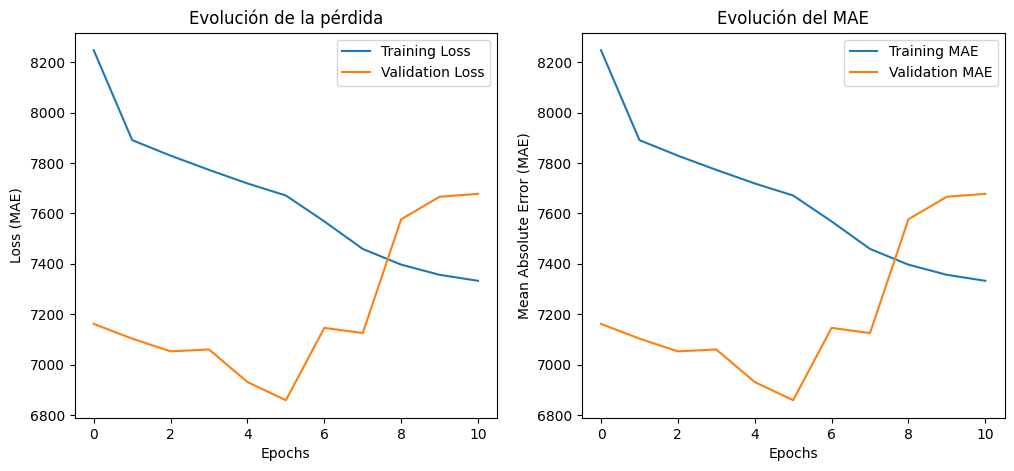

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.title('Evolución de la pérdida')

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Evolución del MAE')

plt.show()